In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
credit=pd.read_csv("credit.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,497,-0.417836,0.981103,1.135820,-0.172593,0.396675,-0.002842,0.519780,0.248763,-0.593497,...,-0.205580,-0.547474,-0.020486,-0.368187,-0.227053,0.105281,0.253800,0.081276,8.83,0
659,498,-0.753769,1.098287,1.835453,0.614571,-0.317859,-0.101055,0.039454,-0.656824,-0.048761,...,1.101142,0.686059,0.005954,0.361744,-0.457852,-0.352576,0.094602,0.170480,5.00,0
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
661,499,1.355790,-1.122921,1.191187,-0.576548,-1.708750,0.274721,-1.640785,0.295838,0.618649,...,0.302035,0.920013,-0.210219,-0.435499,0.450803,0.068454,0.062214,0.022191,22.83,0


# DATA ANALYSIS

In [3]:
credit.shape

(663, 31)

In [4]:
credit.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 31 columns):
Time      663 non-null int64
V1        663 non-null float64
V2        663 non-null float64
V3        663 non-null float64
V4        663 non-null float64
V5        663 non-null float64
V6        663 non-null float64
V7        663 non-null float64
V8        663 non-null float64
V9        663 non-null float64
V10       663 non-null float64
V11       663 non-null float64
V12       663 non-null float64
V13       663 non-null float64
V14       663 non-null float64
V15       663 non-null float64
V16       663 non-null float64
V17       663 non-null float64
V18       663 non-null float64
V19       663 non-null float64
V20       663 non-null float64
V21       663 non-null float64
V22       663 non-null float64
V23       663 non-null float64
V24       663 non-null float64
V25       663 non-null float64
V26       663 non-null float64
V27       663 non-null float64
V28       663 non-null float6

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


# DATA CLEANING

In [7]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

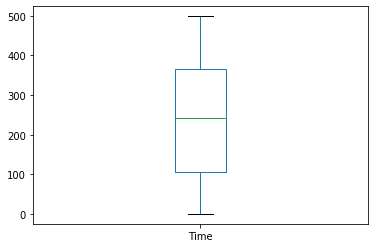

In [68]:
credit["Time"].plot.box()

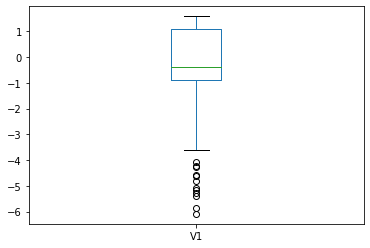

In [69]:
credit["V1"].plot.box()

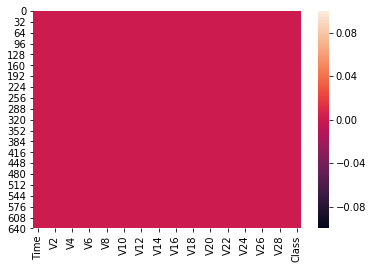

In [8]:
sns.heatmap(credit.isnull())

# SPLIT DATASET INTO X AND Y FOR TRANING AND TESTING

In [9]:
x=credit.drop("Class",axis=1)

In [10]:
y=credit["Class"]

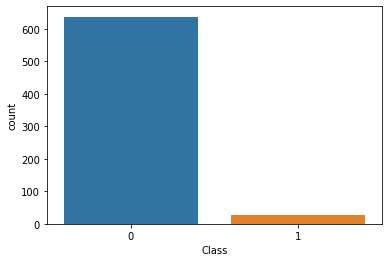

In [11]:
sns.countplot(x="Class",data=credit)

In [12]:
# Here 0 for otherwise condition and 1 for fraud
count=credit['Class'].value_counts()
count

0    637
1     26
Name: Class, dtype: int64

In [13]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,497,-0.417836,0.981103,1.135820,-0.172593,0.396675,-0.002842,0.519780,0.248763,-0.593497,...,0.098874,-0.205580,-0.547474,-0.020486,-0.368187,-0.227053,0.105281,0.253800,0.081276,8.83
659,498,-0.753769,1.098287,1.835453,0.614571,-0.317859,-0.101055,0.039454,-0.656824,-0.048761,...,-0.369512,1.101142,0.686059,0.005954,0.361744,-0.457852,-0.352576,0.094602,0.170480,5.00
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.121156,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98
661,499,1.355790,-1.122921,1.191187,-0.576548,-1.708750,0.274721,-1.640785,0.295838,0.618649,...,0.020548,0.302035,0.920013,-0.210219,-0.435499,0.450803,0.068454,0.062214,0.022191,22.83


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
658    0
659    0
660    0
661    0
662    0
Name: Class, Length: 663, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [16]:
x_train.shape

(523, 30)

In [17]:
y_train.shape

(523,)

In [18]:
x_test.shape

(140, 30)

In [19]:
y_test.shape

(140,)

# APPLYING MODEL

In [20]:
lg=LogisticRegression()

In [59]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(pred)
conf_mat=confusion_matrix(y,pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

accuracy Score= [0.95522388 0.91729323 0.95454545 0.96212121 0.85606061]
Mean Scores 0.9290488772813988
Standard Deviation 0.03973529536529823
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

0.9291101055806938

In [22]:
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
print(predlg)

0.9571428571428572
[[134   3]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       137
           1       0.00      0.00      0.00         3

    accuracy                           0.96       140
   macro avg       0.49      0.49      0.49       140
weighted avg       0.96      0.96      0.96       140

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [23]:
con=confusion_matrix(y_test,predlg)

In [24]:
con

array([[134,   3],
       [  3,   0]], dtype=int64)

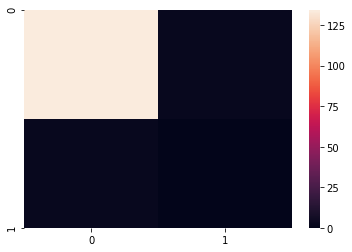

In [25]:
sns.heatmap(con)

In [26]:
data=pd.DataFrame(y_test,predlg)

In [27]:
data

,Class
0,NaN
0,NaN
0,NaN
0,NaN
0,NaN
...,...
0,NaN
0,NaN
0,NaN
0,NaN


In [28]:
from sklearn import metrics

In [29]:
#Print ROC curve 
print("ROC curve evaluation")
fpr,tpr,threshold=metrics.roc_curve(y_test,predlg)

ROC curve evaluation


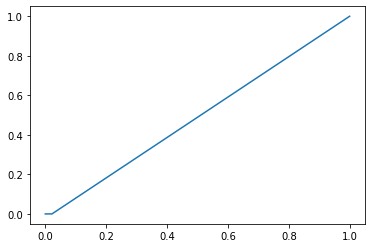

In [30]:
auc=metrics.roc_auc_score(y_test,predlg)
plt.plot(fpr,tpr,label="credit,auc="+str(auc))
plt.show()

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
# Print AUPRC(Area under Precision recall curve)
print("AUPRC curve evaluation")


AUPRC curve evaluation


In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [34]:
f1=f1_score(y_test,predlg)

In [35]:
f1

0.0

In [36]:
prob=lg.predict_proba(x_test)

In [37]:
prob

array([[0.98401824, 0.01598176],
       [0.94461305, 0.05538695],
       [0.98454401, 0.01545599],
       [0.99853293, 0.00146707],
       [0.97711668, 0.02288332],
       [0.89583568, 0.10416432],
       [0.15580577, 0.84419423],
       [0.98826418, 0.01173582],
       [0.94251919, 0.05748081],
       [0.99231802, 0.00768198],
       [0.98642595, 0.01357405],
       [0.95439572, 0.04560428],
       [0.97441128, 0.02558872],
       [0.9589783 , 0.0410217 ],
       [0.91536933, 0.08463067],
       [0.98581277, 0.01418723],
       [0.97137762, 0.02862238],
       [0.9573823 , 0.0426177 ],
       [0.10749487, 0.89250513],
       [0.91207888, 0.08792112],
       [0.97931035, 0.02068965],
       [0.97649179, 0.02350821],
       [0.90708812, 0.09291188],
       [0.98249867, 0.01750133],
       [0.91248059, 0.08751941],
       [0.98479591, 0.01520409],
       [0.98686899, 0.01313101],
       [0.99033387, 0.00966613],
       [0.96901865, 0.03098135],
       [0.99477116, 0.00522884],
       [0.

In [38]:
prob=prob[:,1]

In [39]:
prob

array([0.01598176, 0.05538695, 0.01545599, 0.00146707, 0.02288332,
       0.10416432, 0.84419423, 0.01173582, 0.05748081, 0.00768198,
       0.01357405, 0.04560428, 0.02558872, 0.0410217 , 0.08463067,
       0.01418723, 0.02862238, 0.0426177 , 0.89250513, 0.08792112,
       0.02068965, 0.02350821, 0.09291188, 0.01750133, 0.08751941,
       0.01520409, 0.01313101, 0.00966613, 0.03098135, 0.00522884,
       0.07765023, 0.04094765, 0.13477557, 0.03901671, 0.0086542 ,
       0.01567036, 0.01618985, 0.09841301, 0.02333742, 0.10990906,
       0.03209542, 0.03250481, 0.01020964, 0.01250275, 0.13365771,
       0.03424996, 0.12444659, 0.00440139, 0.00681853, 0.04974502,
       0.05919269, 0.12072608, 0.00779979, 0.0279196 , 0.00952452,
       0.12980016, 0.0094073 , 0.00882938, 0.00799437, 0.00580785,
       0.13607212, 0.02405691, 0.00341375, 0.11506786, 0.04705391,
       0.03151177, 0.01842232, 0.02630549, 0.0205516 , 0.01042415,
       0.01941337, 0.01017583, 0.04569006, 0.01568932, 0.05963

In [40]:
precision,recall,_=precision_recall_curve(y_test,prob)

In [41]:
f1=f1_score(y_test,predlg)

In [42]:
f1

0.0

In [43]:
auc=auc(recall,precision)

In [44]:
auc

0.031432021448599086

# Plotting AUPRC curve

In [45]:
skill=len(y_test[y_test==1])/len(y_test)

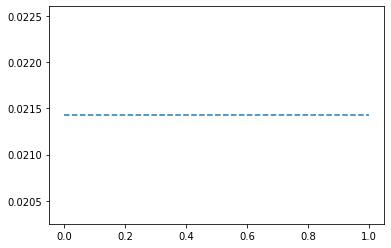

In [46]:
plt.plot([0,1],[skill,skill],linestyle='--',label='skill')


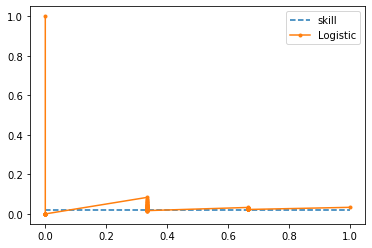

In [47]:
plt.plot([0,1],[skill,skill],linestyle='--',label='skill')
plt.plot(recall,precision,marker='.',label='Logistic')
plt.xlabel=("recall")
plt.ylabel=("precision")
plt.legend()
plt.show()

In [48]:
# Applying bagging methods
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier(n_estimators=300,random_state=41)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [50]:
#Applying Boosting Methods
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

1.0

In [53]:
!pip install xgboost

In [54]:
#Using XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [55]:
x,y=credit.drop("Class",axis=1),credit["Class"]

In [56]:
credit.dmatrix=xgb.DMatrix(data=x,label=y)

In [57]:
xg_reg=xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)
xg_reg.score(x_train,y_train)


[19:25:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8871584534867112

In [65]:
# COMPARISON BETWEEN MODELS
print(accuracy_score(y_test,predlg))
print(rfc.score(x_train,y_train))
print(gbc.score(x_train,y_train))
print(xg_reg.score(x_train,y_train))

0.9571428571428572
1.0
1.0
0.8871584534867112


In [66]:
from sklearn.externals import joblib
joblib.dump(rfc,"credit_card_fraud_detection")
rfc_from_joblib=joblib.load("credit_card_fraud_detection")
rfc_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)